# Living Wage Regression Project

Author: Sue Huynh

Date: April 15 - April 25

Data Source: https://www.kaggle.com/datasets/brandonconrady/living-wage-top-100-cities

## Problem Statement: 

With the dataset of living wage in top 100 US cities with different variables, this project will explore and analyze the correlations of those variables with the living wage, and if possible, predict the living wage with regression models

In this notebook, the workflow goes through stages as below:
1. State the hypothesis
2. Acquire data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Visualize, and report data patterns
6. Perform statistic on data
7. Hypothesis Test result summary
8. Model and predict

## Stage 1: Hypothesis statement

Problem: Knowing from the dataset of listing people's living wage in US cities in 2020, construct hypothesis testing on the correlation between living wage and different features.


1. Number of kids:

With μ1, μ2 are the living wage mean of population of adults with no kids, population with 1 or more kids

H0: μ1 – μ2 = 0

Ha: μ1 ≠ μ2

2. Adults:

With μ1, μ2 are the living wage mean of population of number of adults equals to 1, and number of adults > 1

H0: μ1 – μ2 = 0

Ha: μ1 ≠ μ2

3. Number of people working:

With μ1, μ2 are the living wage mean of population of family having working ratio = 1, and one having working ratio = 2 (working ratio = number of adults/number of adults working)

H0: μ1 – μ2 = 0

Ha: μ1 ≠ μ2

4. City population:

With μ1, μ2 are the living wage mean of population living in top most populated, and population living in the other half

H0: μ1 – μ2 = 0

Ha: μ1 ≠ μ2

5. City population growth:

With μ1, μ2 are the living wage mean of population living in top fastest growing population, and population living in the other half (from 2010 to 2020)

H0: μ1 – μ2 = 0

Ha: μ1 ≠ μ2

6. Population density:

With μ1, μ2 are the living wage mean of population living in top densed city, and population living in the other half

H0: μ1 – μ2 = 0

Ha: μ1 ≠ μ2

## Stage 2: Acquire data

Import libraries needed for the projects

In [1]:
#data analysis
import numpy as np
import pandas as pd
import random as rnd
import statistics as stat
import math

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read dataset in csv

In [2]:
df = pd.read_csv('C:/Users/Owner/Desktop/Data Projects/livingwage.csv')

## Stage 3: Wrangle, prepare and clean data

### Describe data

In [3]:
print(df.columns.values)

['rank_2020' 'city' 'state' 'population_2020' 'population_2010'
 'land_area_sqmi' 'density' 'one_adult_no_kids_living_wage'
 'one_adult_one_kid_living_wage' 'one_adult_two_kids_living_wage'
 'one_adult_three_kids_living_wage'
 'two_adults_one_working_no_kids_living_wage'
 'two_adults_one_working_one_kid_living_wage'
 'two_adults_one_working_two_kids_living_wage'
 'two_adults_one_working_three_kids_living_wage'
 'two_adults_both_working_no_kids_living_wage'
 'two_adults_both_working_one_kid_living_wage'
 'two_adults_both_working_two_kids_living_wage'
 'two_adults_both_working_three_kids_living_wage']


In [4]:
df.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23


In [5]:
df.tail()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
95,96,Fremont,California,230504,214089,78.3,2944,21.88,46.59,58.15,76.92,34.27,41.18,45.16,51.65,17.14,24.88,31.16,38.69
96,97,Spokane,Washington,228989,208916,68.8,3328,12.69,27.13,34.19,44.94,20.97,25.56,29.11,32.17,10.15,14.98,18.95,22.68
97,98,Santa Clarita,California,228673,176320,70.8,3230,19.35,42.41,51.91,67.54,32.08,39.06,43.03,48.44,16.04,22.79,28.04,34.00
98,99,Baton Rouge,Louisiana,227470,229493,86.3,2636,13.99,29.24,35.69,45.02,23.23,28.25,31.90,33.82,11.32,16.02,19.74,22.60
99,100,Richmond,Virginia,226610,204214,59.9,3783,15.91,30.84,38.12,49.05,24.35,28.96,32.57,35.26,12.06,16.81,20.94,24.61


So far, we know that the features are: 

* Categorical: city, state
* Discrete data: rank_2020, population_2020, population_2022, density
* Continuous data: land_area_sqmi, wages
* Ordinal data: rank_2020


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   rank_2020                                       100 non-null    int64  
 1   city                                            100 non-null    object 
 2   state                                           100 non-null    object 
 3   population_2020                                 100 non-null    int64  
 4   population_2010                                 100 non-null    int64  
 5   land_area_sqmi                                  100 non-null    float64
 6   density                                         100 non-null    int64  
 7   one_adult_no_kids_living_wage                   100 non-null    float64
 8   one_adult_one_kid_living_wage                   100 non-null    float64
 9   one_adult_two_kids_living_wage              

The dataset contains NO blank, null or missing values. Besides, 2 features are strings (object), and 17 features are integer or floats

In [7]:
df.describe()

,rank_2020,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
count,100.000000,1.000000e+02,1.000000e+02,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000
mean,50.500000,6.500400e+05,5.978716e+05,178.54600,4869.340000,15.834400,32.654300,40.586400,52.928700,25.29410,30.283300,33.946500,37.514300,12.279300,17.755800,22.20950,26.61440
std,29.011492,9.825555e+05,9.213096e+05,209.84201,4283.033187,2.716893,5.444451,6.809935,9.425578,3.59775,4.457724,4.599372,5.996782,1.699192,2.787149,3.47464,4.75135
min,1.000000,2.266100e+05,1.763200e+05,14.70000,171.000000,12.400000,26.180000,31.690000,40.570000,20.97000,24.940000,28.360000,30.460000,10.150000,14.390000,17.61000,20.36000
25%,25.750000,2.822168e+05,2.468900e+05,66.65000,2498.500000,13.945000,29.190000,35.897500,46.607500,22.95500,27.267500,30.885000,33.507500,11.120000,16.010000,19.93500,23.45500
50%,50.500000,3.902635e+05,3.564605e+05,111.75000,3667.500000,15.080000,30.660000,38.060000,49.125000,24.12000,28.985000,32.410000,35.330000,11.845000,16.645000,20.94000,24.72000
75%,75.250000,6.445530e+05,6.004240e+05,203.12500,5199.500000,16.330000,33.932500,43.140000,57.007500,25.64500,31.240000,34.927500,38.752500,12.600000,18.392500,23.51000,28.68000
max,100.000000,8.804190e+06,8.175133e+06,1706.80000,29298.000000,25.120000,50.180000,61.690000,81.630000,37.33000,44.830000,48.810000,56.530000,17.370000,26.680000,32.93000,41.05000


* The total values of from the dataset is 100
* The living wage data is numerical continuous data
* The standard deviation of among families having no kids are quite similar (2.7, 3.59, 1.7), same for one-kid, two-kid, and three-kid families
* The living wages varied within each combination of family size and people working from the lowest range $7 to the highest range $41

In [8]:
df.describe(include=['O'])

,city,state
count,100,100
unique,100,34
top,New York,California
freq,1,17


We could see that all of the city values are unique with the majority of them are in California

### Add features by appending

The data is still not in the good form for analyzing and testing our hypothesis on living wages and other features which are embedded in the columns (number of kids, number of adults, number of people working).

Now, we separate the living wage columns into different dataframes along with the other features.

In [9]:
#create 12 dataframes containing living wage of each feature combinations

#one adult with no kids
df10 = pd.DataFrame()
df10 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','one_adult_no_kids_living_wage']]
df10.rename({'one_adult_no_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#one adult with one kid
df11 = pd.DataFrame()
df11 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','one_adult_one_kid_living_wage']]
df11.rename({'one_adult_one_kid_living_wage': 'living_wage'}, axis = 1, inplace = True)

#one adult with two kids
df12 = pd.DataFrame()
df12 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','one_adult_two_kids_living_wage']]
df12.rename({'one_adult_two_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#one adult with three kids
df13 = pd.DataFrame()
df13 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','one_adult_three_kids_living_wage']]
df13.rename({'one_adult_three_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, one working with no kids 
df210 = pd.DataFrame()
df210 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_one_working_no_kids_living_wage']]
df210.rename({'two_adults_one_working_no_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, one working with one kid
df211 = pd.DataFrame()
df211 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_one_working_one_kid_living_wage']]
df211.rename({'two_adults_one_working_one_kid_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, one working with two kids
df212 = pd.DataFrame()
df212 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_one_working_two_kids_living_wage']]
df212.rename({'two_adults_one_working_two_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, one working with three kids
df213 = pd.DataFrame()
df213 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_one_working_three_kids_living_wage']]
df213.rename({'two_adults_one_working_three_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, two working with no kids 
df220 = pd.DataFrame()
df220 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_both_working_no_kids_living_wage']]
df220.rename({'two_adults_both_working_no_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, two working with one kid
df221 = pd.DataFrame()
df221 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_both_working_one_kid_living_wage']]
df221.rename({'two_adults_both_working_one_kid_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, two working with two kids
df222 = pd.DataFrame()
df222 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_both_working_two_kids_living_wage']]
df222.rename({'two_adults_both_working_two_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)

#two adults, two working with three kids
df223 = pd.DataFrame()
df223 = df[['rank_2020','city','state','population_2020','population_2010','land_area_sqmi','density','two_adults_both_working_three_kids_living_wage']]
df223.rename({'two_adults_both_working_three_kids_living_wage': 'living_wage'}, axis = 1, inplace = True)


C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Now, we append all the dataframes into an updated dataframe

In [10]:
#append all 12 dataframes together
df_updated = df10.append([df11,df12,df13,df210,df211,df212,df213,df220,df221,df222,df223])
df_updated.head()
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank_2020        1200 non-null   int64  
 1   city             1200 non-null   object 
 2   state            1200 non-null   object 
 3   population_2020  1200 non-null   int64  
 4   population_2010  1200 non-null   int64  
 5   land_area_sqmi   1200 non-null   float64
 6   density          1200 non-null   int64  
 7   living_wage      1200 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 84.4+ KB


Now, we add the features kids, number of adults, and number of adults into the updated dataframe based on the row numbers following the data frame appending sequence above

In [11]:
#add kids number of adults feature
df_updated['kid']  = 0
df_updated.iloc[101:200,8] = 1
df_updated.iloc[201:300,8] = 2
df_updated.iloc[301:400,8] = 3
df_updated.iloc[501:600,8] = 1
df_updated.iloc[601:700,8] = 2
df_updated.iloc[701:800,8] = 3
df_updated.iloc[901:1000,8] = 1
df_updated.iloc[1001:1100,8] = 2
df_updated.iloc[1101:1200,8] = 3

df_updated.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,0
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,0
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,0
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,0
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,0


In [12]:
df_updated.tail()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid
95,96,Fremont,California,230504,214089,78.3,2944,38.69,3
96,97,Spokane,Washington,228989,208916,68.8,3328,22.68,3
97,98,Santa Clarita,California,228673,176320,70.8,3230,34.00,3
98,99,Baton Rouge,Louisiana,227470,229493,86.3,2636,22.60,3
99,100,Richmond,Virginia,226610,204214,59.9,3783,24.61,3


In [13]:
#add number of adults
df_updated['adult']  = 1
df_updated.iloc[401:1200,9] = 2

df_updated.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,0,1
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,0,1
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,0,1
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,0,1
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,0,1


In [14]:
df_updated.tail()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult
95,96,Fremont,California,230504,214089,78.3,2944,38.69,3,2
96,97,Spokane,Washington,228989,208916,68.8,3328,22.68,3,2
97,98,Santa Clarita,California,228673,176320,70.8,3230,34.00,3,2
98,99,Baton Rouge,Louisiana,227470,229493,86.3,2636,22.60,3,2
99,100,Richmond,Virginia,226610,204214,59.9,3783,24.61,3,2


In [15]:
#add number of adults working
df_updated['working']  = 1
df_updated.iloc[801:1200,10] = 2

df_updated.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,0,1,1
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,0,1,1
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,0,1,1
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,0,1,1
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,0,1,1


In [16]:
df_updated.tail()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working
95,96,Fremont,California,230504,214089,78.3,2944,38.69,3,2,2
96,97,Spokane,Washington,228989,208916,68.8,3328,22.68,3,2,2
97,98,Santa Clarita,California,228673,176320,70.8,3230,34.00,3,2,2
98,99,Baton Rouge,Louisiana,227470,229493,86.3,2636,22.60,3,2,2
99,100,Richmond,Virginia,226610,204214,59.9,3783,24.61,3,2,2


### Add a new feature from existing features

As one of hypothesis statements will be tested based on the population growth rate from 2010 to 2020, the 'population_growth_rate' is needed to calculated and added to the dataframe.

In [17]:
df_updated['population_growth_rate'] = round((df_updated['population_2020'] - df_updated['population_2010']) / df_updated['population_2010']*100,2)
df_updated.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,0,1,1,7.69
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,0,1,1,2.80
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,0,1,1,1.88
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,0,1,1,9.77
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,0,1,1,11.24


### Add new features to the original dataframe

In [18]:
df['population_growth_rate'] = round((df['population_2020'] - df['population_2010']) / df['population_2010']*100,2)
df.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage,population_growth_rate
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40,7.69
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01,2.80
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94,1.88
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09,9.77
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23,11.24


In [19]:
df['avg_living_wage'] = df[['one_adult_no_kids_living_wage','one_adult_one_kid_living_wage','one_adult_two_kids_living_wage','one_adult_three_kids_living_wage','two_adults_one_working_no_kids_living_wage','two_adults_one_working_one_kid_living_wage','two_adults_one_working_two_kids_living_wage','two_adults_one_working_three_kids_living_wage','two_adults_both_working_no_kids_living_wage','two_adults_both_working_one_kid_living_wage','two_adults_both_working_two_kids_living_wage','two_adults_both_working_three_kids_living_wage']].mean(axis=1)
df.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,...,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage,population_growth_rate,avg_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,...,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40,7.69,34.203333
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,...,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01,2.80,36.417500
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,...,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94,1.88,28.535000
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,...,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09,9.77,25.823333
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,...,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23,11.24,26.784167


## Stage 4: Analyze Data

### Pivot data

In [20]:
#average living wage for different kid values
df_updated[['kid','living_wage']].groupby(['kid'], as_index=False).mean().sort_values(by = 'living_wage', ascending = False)

,kid,living_wage
3,3,38.944848
2,2,32.189899
1,1,26.852020
0,0,18.407864


In [21]:
#average living wage for different adult values
df_updated[['adult','living_wage']].groupby(['adult'], as_index=False).mean().sort_values(by = 'living_wage',ascending = False)

,adult,living_wage
0,1,35.485137
1,2,25.732866


In [22]:
df_updated.columns.values

array(['rank_2020', 'city', 'state', 'population_2020', 'population_2010',
       'land_area_sqmi', 'density', 'living_wage', 'kid', 'adult',
       'working', 'population_growth_rate'], dtype=object)

In [23]:
#average living wage for different adult working values
df_updated[['working','living_wage']].groupby(['working'], as_index=False).mean().sort_values(by = 'living_wage',ascending = False)


,working,living_wage
0,1,33.605780
1,2,19.728997


In [24]:
#create a crosstab for number of adults and adults working
pd.crosstab(index = df_updated.working, columns=df_updated.adult, values = df_updated.living_wage, aggfunc='mean', rownames=['Adult Working'], colnames=['Adult Total'])

Adult Total,1,2
Adult Working,,
1,35.485137,31.721725
2,NaN,19.728997


In [25]:
#average living wage for different population sizes in 2020
df_updated[['population_2020','living_wage']].groupby(['population_2020'], as_index=False).mean().sort_values(by = 'living_wage',ascending = False)

,population_2020,living_wage
90,1013240,43.679167
83,873965,42.183333
55,440646,42.183333
4,230504,40.639167
34,307670,39.884167
...,...,...
32,302971,24.008333
14,257141,23.831667
72,633104,23.772500
12,255205,23.700833


In [26]:
#population growth rate in 2020
df_updated[['population_growth_rate','living_wage']].groupby(['population_growth_rate'], as_index=False).mean().sort_values(by = 'living_wage',ascending = False)

,population_growth_rate,living_wage
32,7.11,43.679167
67,12.78,42.183333
40,8.54,42.183333
33,7.67,40.639167
98,44.87,39.884167
...,...,...
9,-0.89,24.008333
61,12.01,23.831667
7,-2.13,23.772500
37,8.10,23.700833


## Stage 5: Visualize data

#### Dataframe index unique test

In [27]:
df_updated.index.is_unique

False

In [28]:
#reindex
df_updated['index'] = np.arange(len(df_updated))
df_updated = df_updated.set_index('index')

### Correlate data

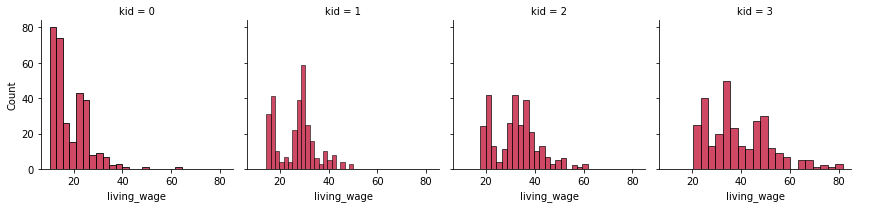

In [29]:
#Hypothesis 1: Number of kids and Living wage

g = sns.FacetGrid(df_updated, col = 'kid')
g.map(sns.histplot, 'living_wage', bins = 20, color='#BF0A30')
g.add_legend()

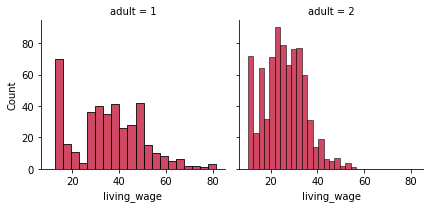

In [30]:
#Hypothesis 2: Number of adults and Living wage

g = sns.FacetGrid(df_updated, col = 'adult')
g.map(sns.histplot, 'living_wage', bins = 20, color='#BF0A30')
g.add_legend()

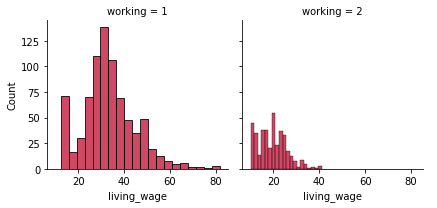

In [31]:
#Hypothesis 3: Number of adults working and Living wage

g = sns.FacetGrid(df_updated, col = 'working')
g.map(sns.histplot, 'living_wage', bins = 20, color='#BF0A30')
g.add_legend()

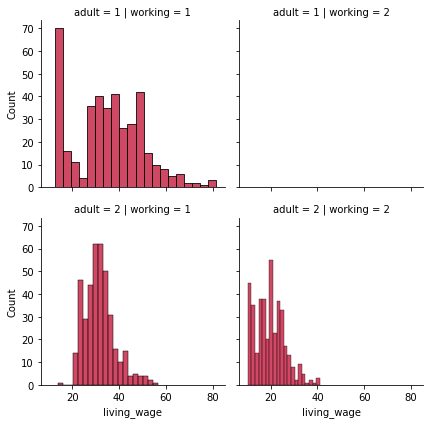

In [32]:
g = sns.FacetGrid(df_updated, col = 'working', row ='adult')
g.map(sns.histplot, 'living_wage', bins = 20,color='#BF0A30')
g.add_legend()

C:\Users\Owner\AppData\Local\Temp/ipykernel_9616/3016918640.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['city'], rotation=45)


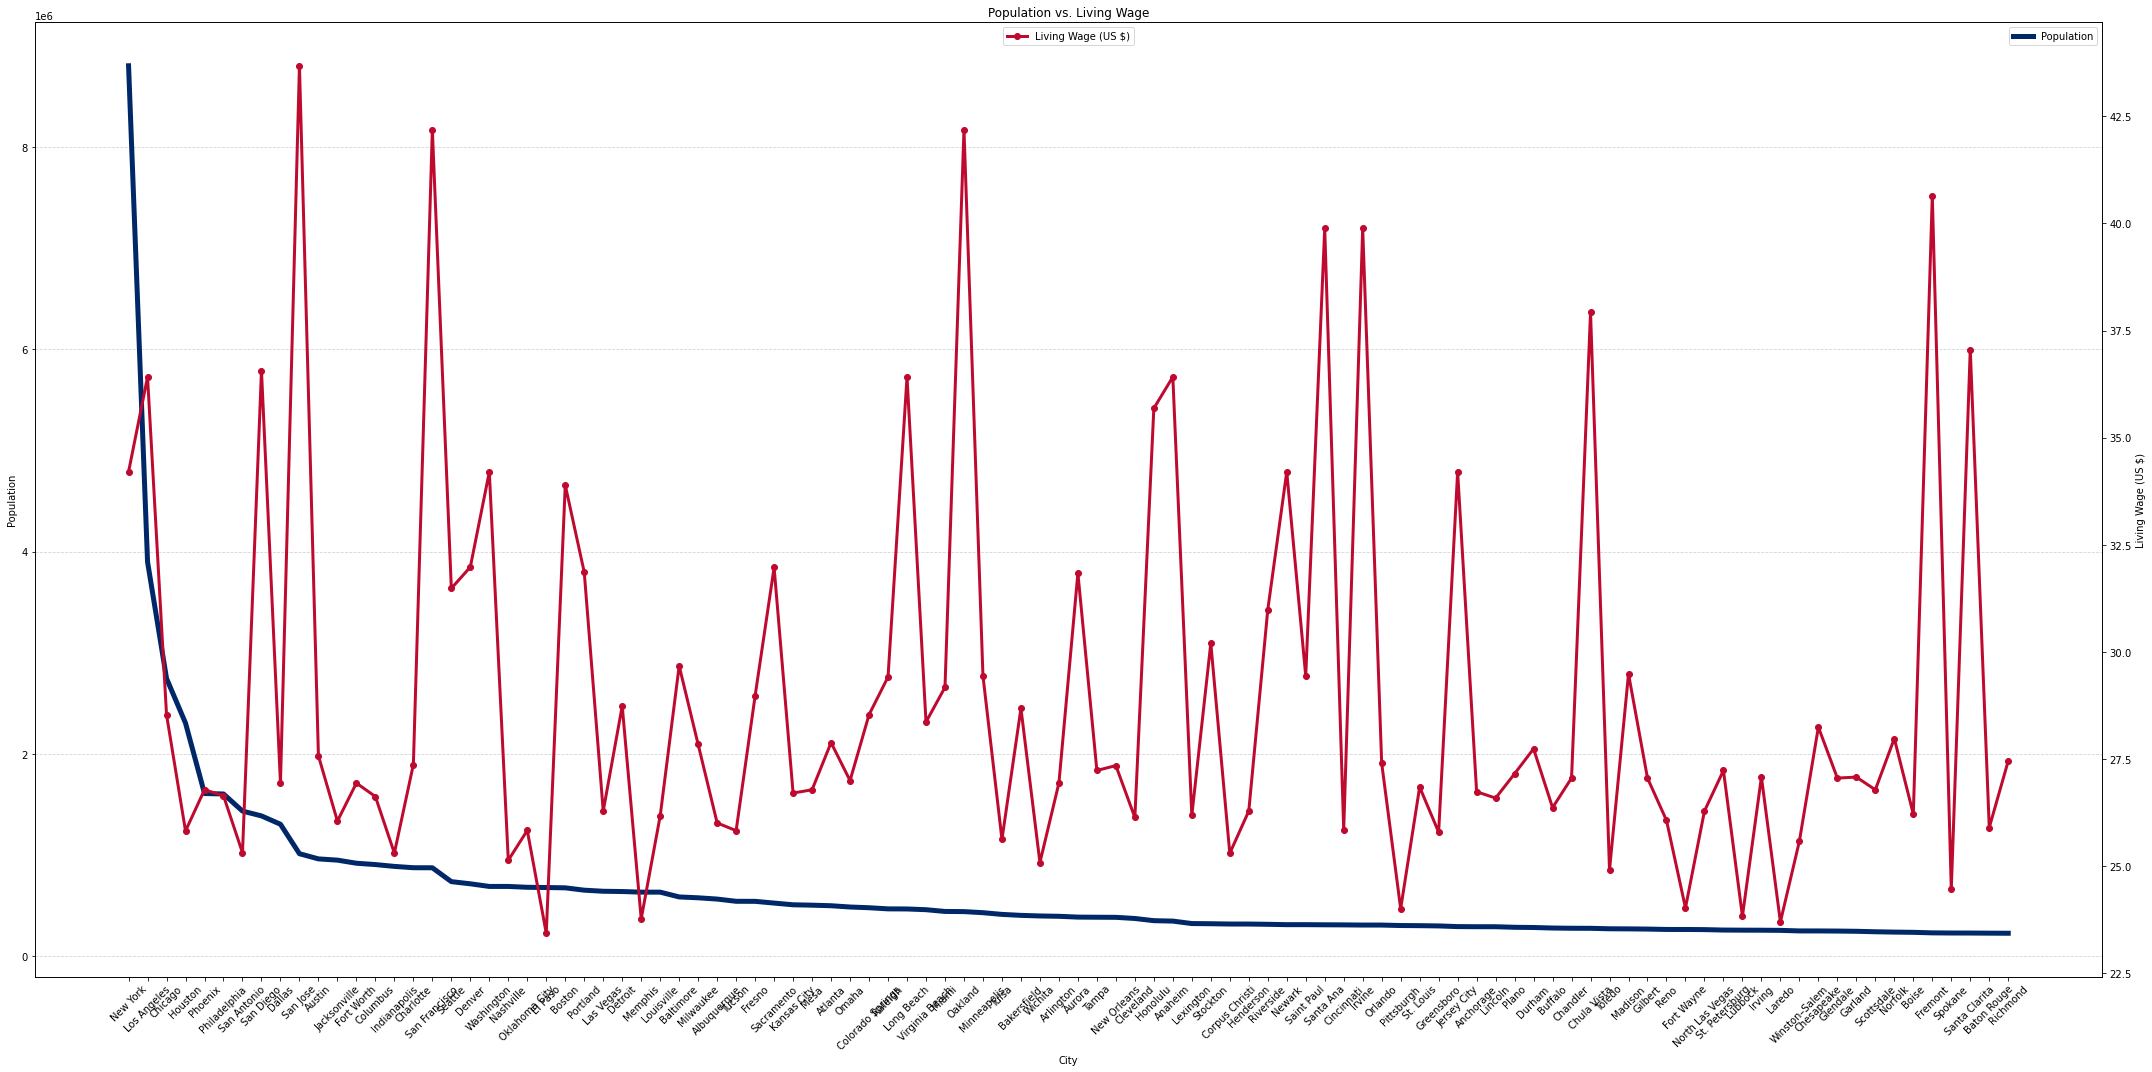

In [33]:
#Hypothesis 4: Population and Living wage

fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.set_title('Population vs. Living Wage')
ax.set_xlabel('City')
ax.plot(df['city'], df['population_2020'], color='#002868',linewidth=5.0)
ax2.plot(df['city'], df['avg_living_wage'], color='#BF0A30', marker='o',linewidth=3.0)
ax.set_ylabel('Population')
ax2.set_ylabel('Living Wage (US $)')
ax.legend(['Population'])
ax2.legend(['Living Wage (US $)'], loc='upper center')
ax.set_xticklabels(df['city'], rotation=45)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp/ipykernel_9616/3605195762.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sorted['city'], rotation=45)


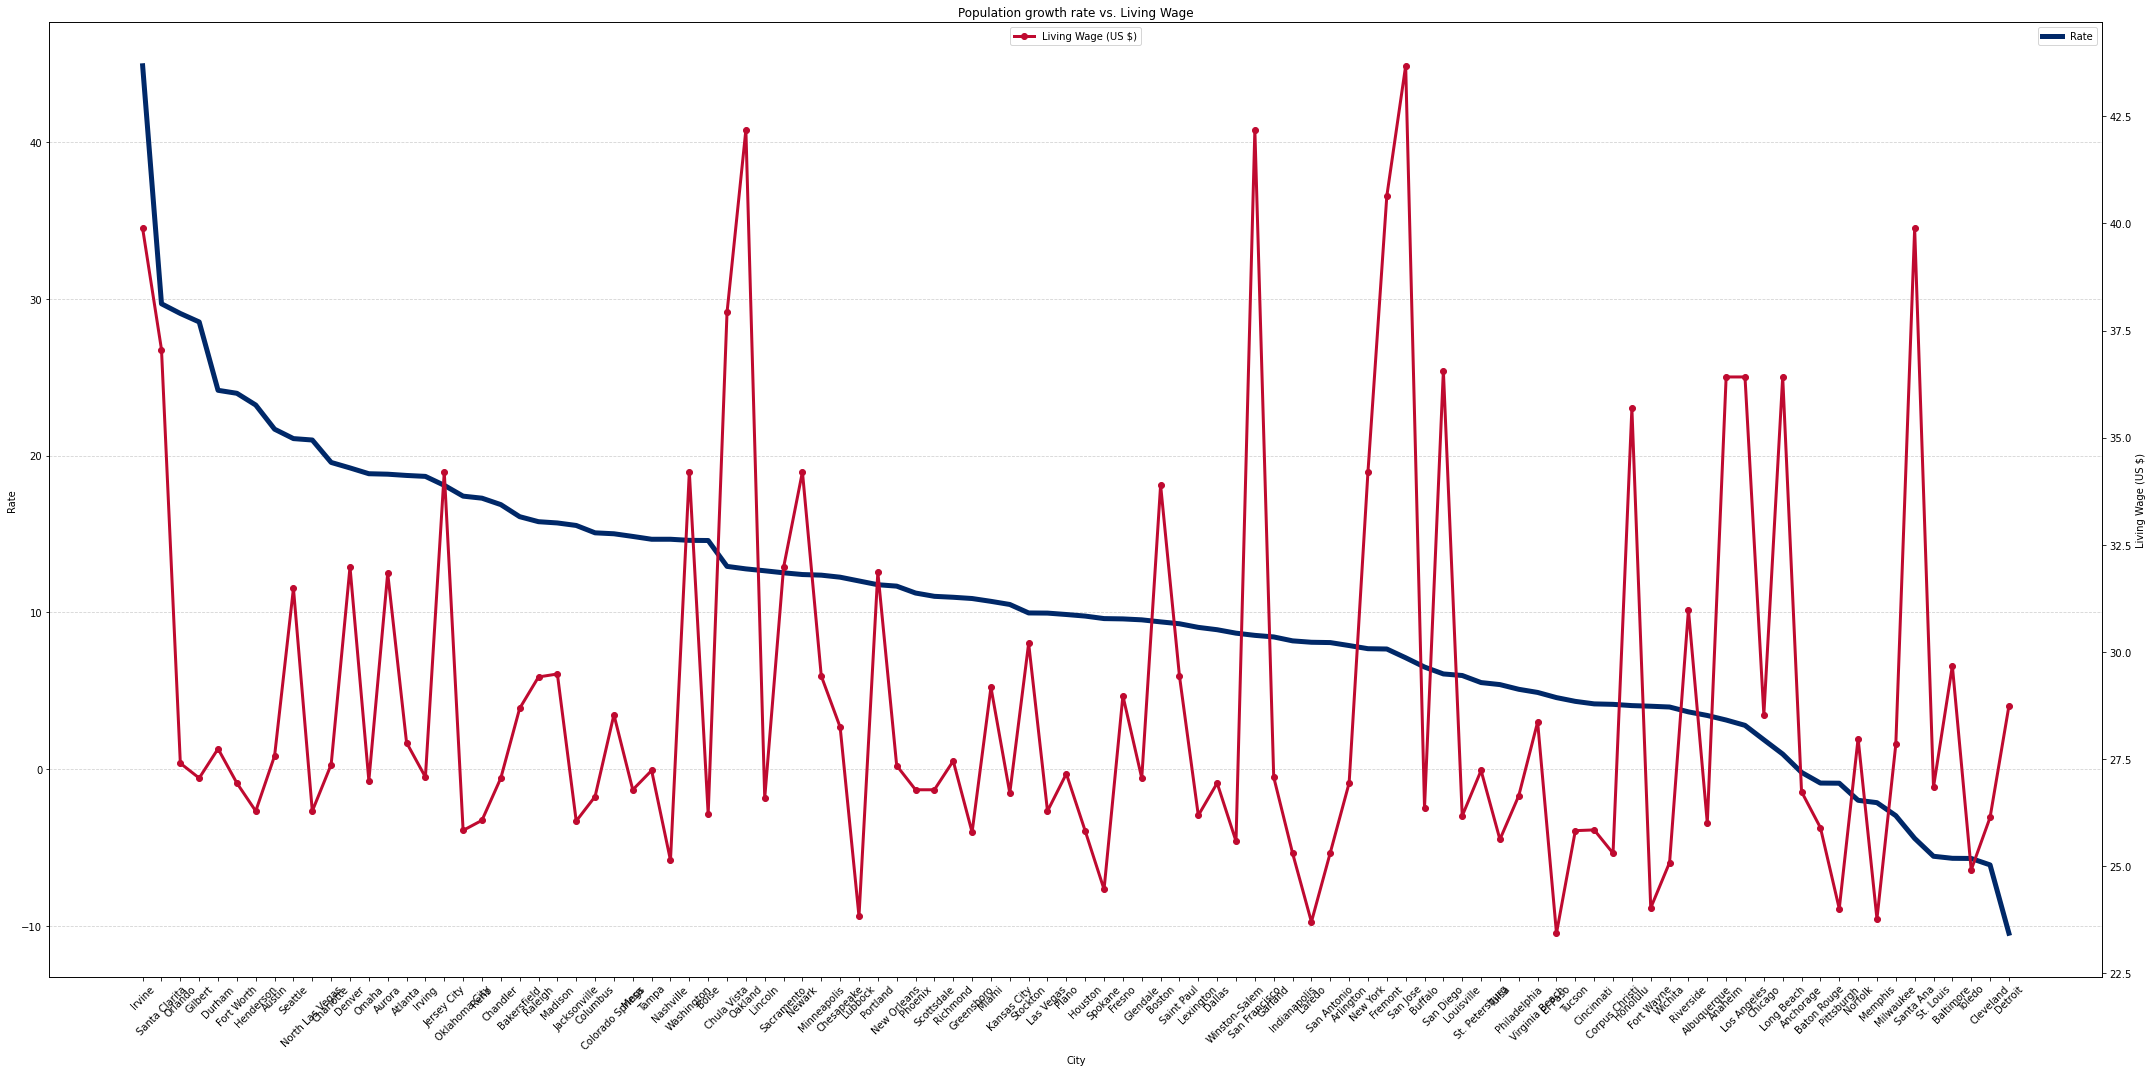

In [34]:
#Hypothesis 5: Population growth rate and Living wage

df_sorted = pd.DataFrame()
df_sorted = df.sort_values(by='population_growth_rate',ascending=False)

fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.set_title('Population growth rate vs. Living Wage')
ax.set_xlabel('City')
ax.plot(df_sorted['city'], df_sorted['population_growth_rate'], color='#002868', linewidth=5.0)
ax2.plot(df_sorted['city'], df_sorted['avg_living_wage'], color='#BF0A30', marker='o',linewidth=3.0)
ax.set_ylabel('Rate')
ax2.set_ylabel('Living Wage (US $)')
ax.legend(['Rate'])
ax2.legend(['Living Wage (US $)'], loc='upper center')
ax.set_xticklabels(df_sorted['city'], rotation=45)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp/ipykernel_9616/3250194720.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_sorted['city'], rotation=45)


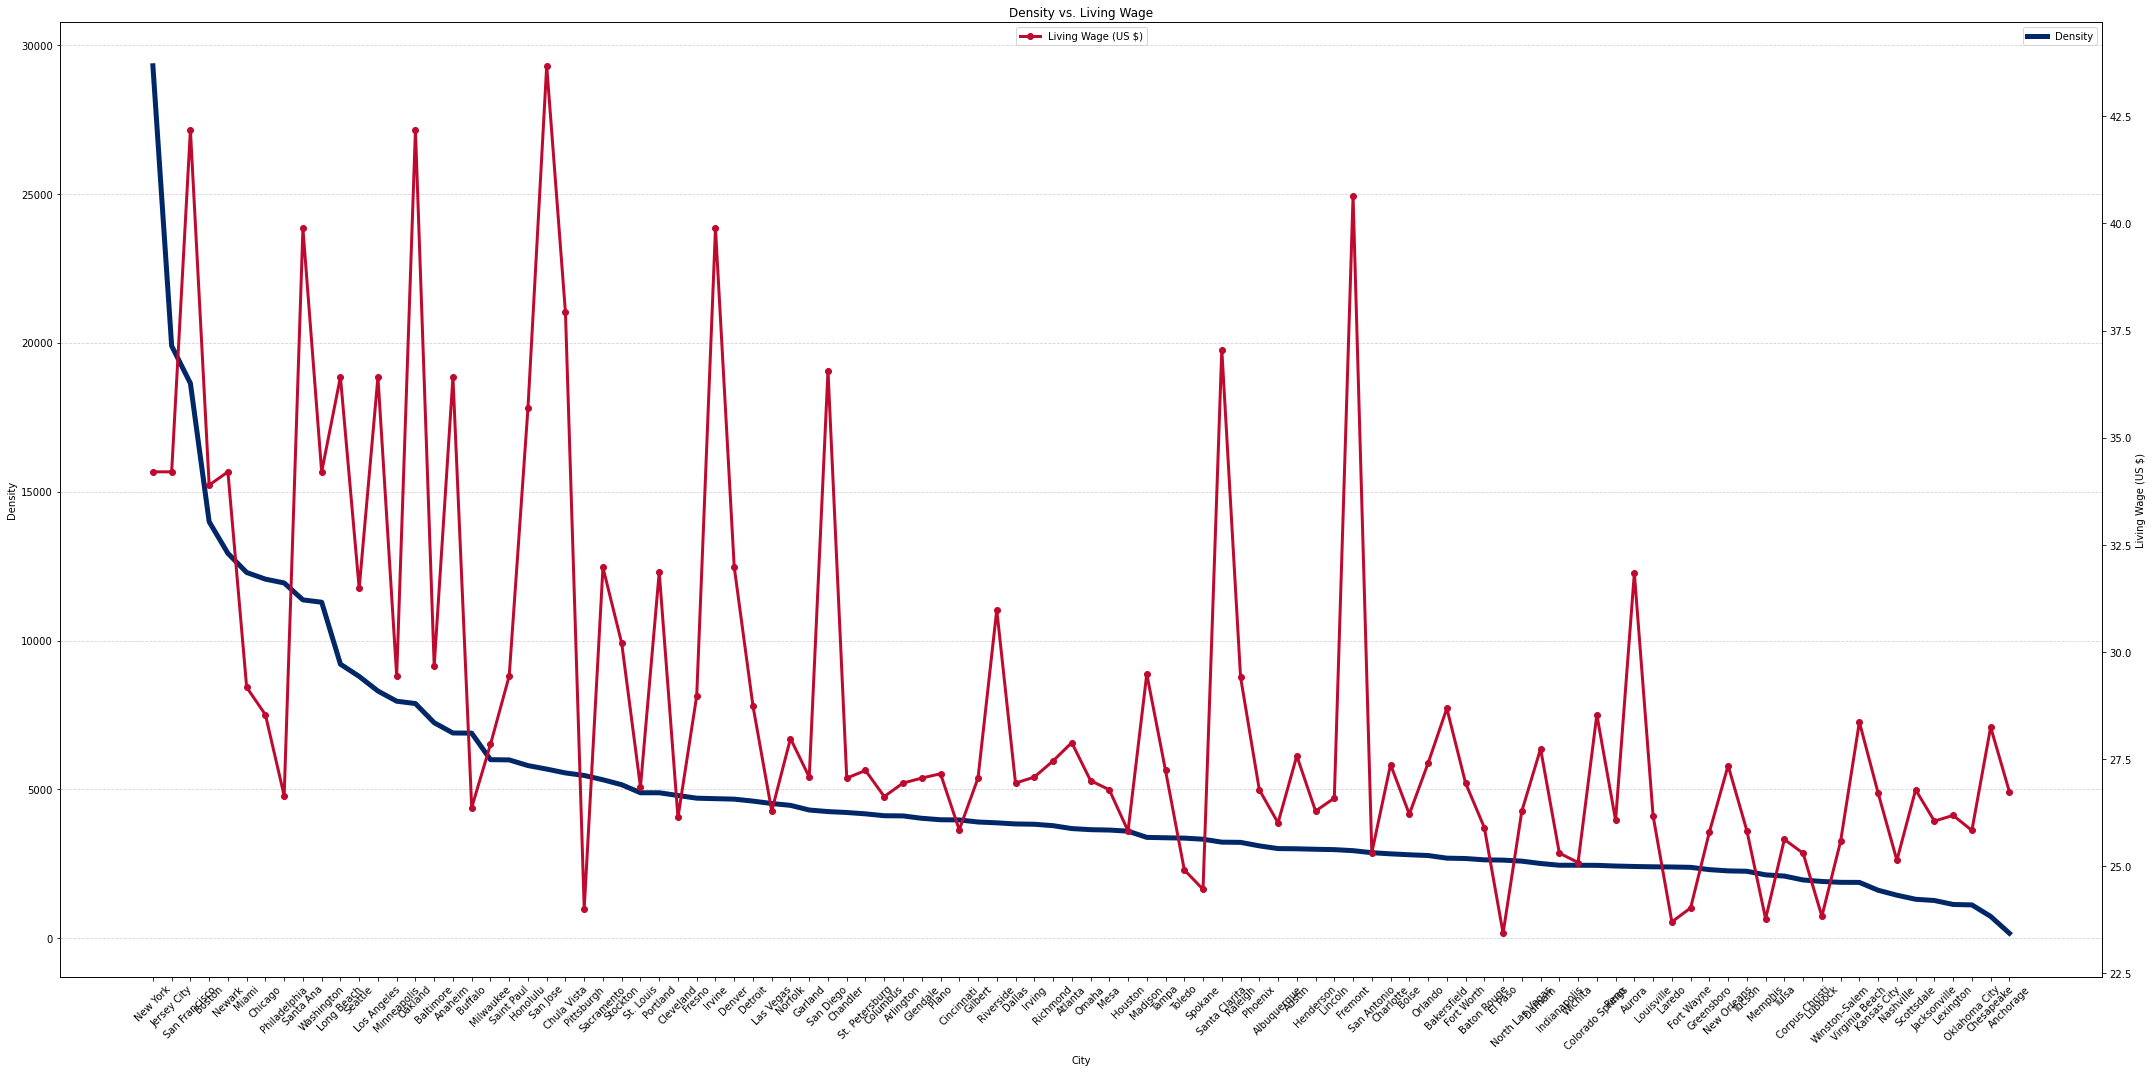

In [35]:
#Hypothesis 6: City density and Living wage

df_sorted = pd.DataFrame()
df_sorted = df.sort_values(by='density',ascending=False)

fig, ax = plt.subplots(figsize=(30,15))
ax2 = ax.twinx()
ax.set_title('Density vs. Living Wage')
ax.set_xlabel('City')
ax.plot(df_sorted['city'], df_sorted['density'], color='#002868', linewidth=5.0)
ax2.plot(df_sorted['city'], df_sorted['avg_living_wage'], color='#BF0A30', marker='o',linewidth=3.0)
ax.set_ylabel('Density')
ax2.set_ylabel('Living Wage (US $)')
ax.legend(['Density'])
ax2.legend(['Living Wage (US $)'], loc='upper center')
ax.set_xticklabels(df_sorted['city'], rotation=45)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

## Stage 6: Perform statistic on data

* Set the significant level at alpha = 0.05

### Hypothesis 1:

1. Re-randomization:

In [36]:
#Select random sample from each population
#No kids population
h1_p1 = df_updated[df_updated['kid'] == 0].sample(n=50)
h1_p1.head()

#Having kids population
h1_p2 = df_updated[df_updated['kid'] > 0].sample(n=50)
h1_p2.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
index,,,,,,,,,,,,
390,91,Glendale,Arizona,248325,226721,61.6,4031,46.16,3,1,1,9.53
702,3,Chicago,Illinois,2746388,2695598,227.7,12061,35.93,3,2,1,1.88
916,17,San Francisco,California,873965,805235,46.9,18635,25.89,1,2,2,8.54
378,79,Toledo,Ohio,270871,287208,80.5,3365,47.24,3,1,1,-5.69
1064,65,Cincinnati,Ohio,309317,296943,77.8,3976,20.55,2,2,2,4.17


2. Calculate statistic:

In [37]:
#No kids population
μ1 = round(h1_p1['living_wage'].mean(),2)
std_dev1= round(stat.stdev(h1_p1['living_wage']),2)
print("Mean of No kids sample set is {} and Standard deviation of No kids sample set is {} ".format(μ1,std_dev1))

#Having kids population
μ2 = round(h1_p2['living_wage'].mean(),2)
std_dev2= round(stat.stdev(h1_p2['living_wage']),2)
print("Mean of Having kids sample set is {} and Standard deviation of Having kids sample set is {} ".format(μ2,std_dev2))

Mean of No kids sample set is 19.79 and Standard deviation of No kids sample set is 6.72 
Mean of Having kids sample set is 31.35 and Standard deviation of Having kids sample set is 12.23 


In [38]:
#Calculate the z-score
z1 = round((μ1-μ2)/math.sqrt(((std_dev1)**2/50) + ((std_dev2)**2/50)),2)
print("The z-score is {} which is smaller than our critical value of 1.96".format(z1))

The z-score is -5.86 which is smaller than our critical value of 1.96


3. Conclusion:
For the hypothesis 1, the z-score is smaller than  thecritical value. Hence, REJECT NULL HYPOTHESIS
> Having kids affects the living wage at top 100 US cities

### Hypothesis 2:

1. Re-randomization:

In [39]:
#Select random sample from each population
#One adult population
h2_p1 = df_updated[df_updated['adult'] == 1].sample(n=50)
h2_p1.head()

#Two adults population
h2_p2 = df_updated[df_updated['adult'] == 2].sample(n=50)
h2_p2.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
index,,,,,,,,,,,,
575,76,Buffalo,New York,278349,261310,40.4,6890,26.74,1,2,1,6.52
1006,7,San Antonio,Texas,1434625,1327407,498.8,2876,19.38,2,2,2,8.08
515,16,Charlotte,North Carolina,874579,731424,308.3,2837,28.29,1,2,1,19.57
450,51,Aurora,Colorado,386261,325078,160.1,2413,27.03,0,2,1,18.82
937,38,Atlanta,Georgia,498715,420003,135.3,3686,17.07,1,2,2,18.74


2. Calculate statistic:

In [40]:
#One adult population
μ1 = round(h2_p1['living_wage'].mean(),2)
std_dev1= round(stat.stdev(h2_p1['living_wage']),2)
print("Mean of one adult sample set is {} and Standard deviation of one adult sample set is {} ".format(μ1,std_dev1))

#Two adults population
μ2 = round(h2_p2['living_wage'].mean(),2)
std_dev2= round(stat.stdev(h2_p2['living_wage']),2)
print("Mean of two adults sample set is {} and Standard deviation of two adults sample set is {} ".format(μ2,std_dev2))

Mean of one adult sample set is 35.55 and Standard deviation of one adult sample set is 17.22 
Mean of two adults sample set is 24.86 and Standard deviation of two adults sample set is 6.87 


In [41]:
#Calculate the z-score
z2 = round((μ1-μ2)/math.sqrt(((std_dev1)**2/50) + ((std_dev2)**2/50)),2)
print("The z-score is {} which is smaller than our critical value of 1.96".format(z1))

The z-score is -5.86 which is smaller than our critical value of 1.96


3. Conclusion:
For the hypothesis 2, the z-score is smaller than the critical value. Hence, REJECT NULL HYPOTHESIS
> Having more adults affects the living wage at top 100 US cities

### Hypothesis 3:

1. Re-randomization:

In [42]:
#Select random sample from each population
#Adults to working ratio = 1 working population
h3_p1 = df_updated[(df_updated['adult']/df_updated['working']) == 1].sample(n=50)
h3_p1.head()

#Adults to working ratio = 2 wokring population
h3_p2 = df_updated[(df_updated['adult']/df_updated['working']) == 2].sample(n=50)
h3_p2.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
index,,,,,,,,,,,,
758,59,Corpus Christi,Texas,317863,305215,162.2,1960,33.18,3,2,1,4.14
459,60,Henderson,Nevada,317610,257729,106.2,2991,23.12,0,2,1,23.23
651,52,Tampa,Florida,384959,335709,114.0,3377,31.99,2,2,1,14.67
703,4,Houston,Texas,2304580,2099451,640.4,3599,33.69,3,2,1,9.77
771,72,Anchorage,Alaska,291247,291826,1706.8,171,35.44,3,2,1,-0.20


2. Calculate statistic:

In [43]:
#One adult population
μ1 = round(h3_p1['living_wage'].mean(),2)
std_dev1= round(stat.stdev(h3_p1['living_wage']),2)
print("Mean of one adult working sample set is {} and Standard deviation of one adult sample set is {} ".format(μ1,std_dev1))

#Two adults population
μ2 = round(h3_p2['living_wage'].mean(),2)
std_dev2= round(stat.stdev(h3_p2['living_wage']),2)
print("Mean of two adults working sample set is {} and Standard deviation of two adults sample set is {} ".format(μ2,std_dev2))

Mean of one adult working sample set is 27.19 and Standard deviation of one adult sample set is 13.69 
Mean of two adults working sample set is 32.4 and Standard deviation of two adults sample set is 8.04 


In [44]:
#Calculate the z-score
z3 = round((μ1-μ2)/math.sqrt(((std_dev1)**2/50) + ((std_dev2)**2/50)),2)
print("The z-score is {}".format(z3))

The z-score is -2.32


3. Conclusion: For the hypothesis 3, the z-score is in the (-1.96, 1.96). Hence, we FAIL to reject the null hypothesis
> Having higher adults to working ratio working has no effects on the living wage in top 100 cities

### Hypothesis 4:

1. Re-randomization:

In [45]:
#Select random sample from each population
#City population with population rank >=50

h4_p1 = df_updated[(df_updated['rank_2020'] >=50)].sample(n=50)
h4_p1.head()

h4_p2 = df_updated[df_updated['rank_2020'] < 50].sample(n=50)
h4_p2.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
index,,,,,,,,,,,,
812,13,Fort Worth,Texas,918915,741206,342.9,2680,11.50,0,2,2,23.98
847,48,Bakersfield,California,403455,347483,149.8,2693,12.03,0,2,2,16.11
839,40,Colorado Springs,Colorado,478961,416427,195.4,2451,11.68,0,2,2,15.02
706,7,San Antonio,Texas,1434625,1327407,498.8,2876,32.89,3,2,1,8.08
142,43,Virginia Beach,Virginia,459470,437994,244.7,1878,31.83,1,1,1,4.90


2. Calculate statistic:

In [46]:
#Top 50 population
μ1 = round(h4_p1['living_wage'].mean(),2)
std_dev1= round(stat.stdev(h4_p1['living_wage']),2)
print("Mean of top 50 population sample set is {} and Standard deviation of one adult sample set is {} ".format(μ1,std_dev1))

#Bottom 50 population
μ2 = round(h4_p2['living_wage'].mean(),2)
std_dev2= round(stat.stdev(h4_p2['living_wage']),2)
print("Mean of bottom 50 population sample set is {} and Standard deviation of two adults sample set is {} ".format(μ2,std_dev2))

Mean of top 50 population sample set is 25.83 and Standard deviation of one adult sample set is 10.91 
Mean of bottom 50 population sample set is 31.33 and Standard deviation of two adults sample set is 14.1 


In [47]:
#Calculate the z-score
z4 = round((μ1-μ2)/math.sqrt(((std_dev1)**2/50) + ((std_dev2)**2/50)),2)
print("The z-score is {}".format(z4))

The z-score is -2.18


3. Conclusion: For the hypothesis 4, the z-score is in the (-1.96, 1.96). Hence, we FAIL to reject the null hypothesis
> Living in more populated cities has no effects on the living wage in top 100 cities

### Hypothesis 5:

1. Re-randomization:

In [48]:
#rank and reindex the original dataframe based on population growing rate
df_sorted = df.sort_values(by='population_growth_rate',ascending=False)
df_sorted.reset_index(inplace=True)
df_sorted

df_sorted['index'] = np.arange(len(df_sorted))

df_sorted

,index,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,...,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage,population_growth_rate,avg_living_wage
0,0,66,Irvine,California,307670,212375,65.6,4690,22.44,45.36,...,34.10,41.01,44.99,52.08,17.05,24.26,30.01,37.31,44.87,39.884167
1,1,98,Santa Clarita,California,228673,176320,70.8,3230,19.35,42.41,...,32.08,39.06,43.03,48.44,16.04,22.79,28.04,34.00,29.69,37.057500
2,2,67,Orlando,Florida,307573,238300,110.6,2781,15.44,31.05,...,24.34,28.88,32.28,35.03,11.92,16.83,20.91,24.68,29.07,27.403333
3,3,81,Gilbert,Arizona,267918,208453,68.6,3906,15.76,29.72,...,25.20,29.59,33.32,37.30,12.60,16.35,19.76,23.30,28.53,27.056667
4,4,75,Durham,North Carolina,283506,228330,112.8,2513,15.22,31.24,...,23.70,27.98,31.62,34.16,11.80,17.02,21.87,26.17,24.17,27.740833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,69,St. Louis,Missouri,301578,319294,61.7,4888,14.07,30.38,...,23.28,28.37,32.07,34.26,11.40,16.60,20.87,24.39,-5.55,26.847500
96,96,30,Baltimore,Maryland,585708,620961,80.9,7240,15.81,33.91,...,25.78,31.19,34.78,37.82,12.15,18.33,22.87,27.21,-5.68,29.675000
97,97,79,Toledo,Ohio,270871,287208,80.5,3365,12.52,27.90,...,21.22,25.21,28.81,30.81,10.32,15.33,19.97,23.71,-5.69,24.915000
98,98,54,Cleveland,Ohio,372624,396815,77.7,4796,13.30,29.35,...,22.17,26.13,29.73,31.80,10.72,16.05,20.97,25.23,-6.10,26.137500


In [49]:
#Top 50 highest population growth rate
df_top_sorted = df_sorted.loc[df_sorted['index'] >=50, 'avg_living_wage']
h5_p1 = df_top_sorted.sample(n=40)

#Top 50 bottom population growth_rate
df_bottom_sorted = df_sorted.loc[df_sorted['index'] <50, 'avg_living_wage']
h5_p2 = df_bottom_sorted.sample(n=40)
h5_p2.tail()

31    37.922500
25    28.535833
32    42.183333
38    23.831667
29    34.200833
Name: avg_living_wage, dtype: float64

2. Calculate statistic:

In [50]:
#Top 50 growing population
μ1 = round(h5_p1.mean(),2)
std_dev1= round(stat.stdev(h5_p1),2)
print("Mean of top 50 growing population sample set is {} and Standard deviation of one adult sample set is {} ".format(μ1,std_dev1))

#Bottom 50 growing population
μ2 = round(h5_p2.mean(),2)
std_dev2= round(stat.stdev(h5_p2),2)
print("Mean of bottom 50 growing population sample set is {} and Standard deviation of two adults sample set is {} ".format(μ2,std_dev2))

Mean of top 50 growing population sample set is 29.39 and Standard deviation of one adult sample set is 5.61 
Mean of bottom 50 growing population sample set is 29.18 and Standard deviation of two adults sample set is 4.14 


In [51]:
#Calculate the z-score
z5 = round((μ1-μ2)/math.sqrt(((std_dev1)**2/50) + ((std_dev2)**2/50)),2)
print("The z-score is {}".format(z5))

The z-score is 0.21


3. Conclusion: For the hypothesis 5, the z-score is in the (-1.96, 1.96). Hence, we FAIL to reject the null hypothesis
> Living in fast growing cities has no effects on the living wage in top 100 cities

### Hypothesis 6:

1. Re-randomization:

In [52]:
#rank and reindex the original dataframe based on density
df_sorted = df.sort_values(by='density',ascending=False)
df_sorted.reset_index(inplace=True)
df_sorted

df_sorted['index'] = np.arange(len(df_sorted))

df_sorted

,index,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,...,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage,population_growth_rate,avg_living_wage
0,0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,...,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40,7.69,34.203333
1,1,71,Jersey City,New Jersey,292449,247597,14.7,19894,20.00,38.99,...,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40,18.11,34.203333
2,2,17,San Francisco,California,873965,805235,46.9,18635,22.88,48.61,...,35.48,42.97,46.95,54.12,16.23,25.89,32.29,40.28,8.54,42.183333
3,3,24,Boston,Massachusetts,675647,617594,48.3,13989,19.17,39.08,...,27.79,33.14,36.55,40.54,13.35,20.88,26.89,33.19,9.40,33.893333
4,4,62,Newark,New Jersey,311549,277140,24.1,12927,20.00,38.99,...,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40,12.42,34.203333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,12,Jacksonville,Florida,949611,821784,747.3,1271,13.48,29.61,...,23.02,27.58,30.98,33.34,10.94,16.11,20.13,23.63,15.55,26.053333
96,96,57,Lexington,Kentucky,322570,295803,283.6,1137,13.88,29.36,...,22.65,27.28,30.92,33.47,11.03,16.08,20.39,24.12,9.05,26.185833
97,97,22,Oklahoma City,Oklahoma,681054,579999,606.2,1123,14.11,28.92,...,22.96,27.49,31.10,33.56,11.35,15.85,19.77,23.11,17.42,25.835833
98,98,90,Chesapeake,Virginia,249422,222209,338.5,737,16.33,31.67,...,24.57,29.51,33.12,36.61,12.28,17.22,21.49,25.70,12.25,28.246667


In [53]:
#Top 50 highest population growth rate
df_top_sorted = df_sorted.loc[df_sorted['index'] >=50, 'avg_living_wage']
h6_p1 = df_top_sorted.sample(n=40)

#Top 50 bottom population growth_rate
df_bottom_sorted = df_sorted.loc[df_sorted['index'] <50, 'avg_living_wage']
h6_p2 = df_bottom_sorted.sample(n=40)
h6_p2.tail()

29    28.976667
13    29.439167
17    26.367500
36    36.565000
10    36.417500
Name: avg_living_wage, dtype: float64

2. Calculate statistic:

In [54]:
#Top 50 densed population
μ1 = round(h6_p1.mean(),2)
std_dev1= round(stat.stdev(h6_p1),2)
print("Mean of top 50 densed population sample set is {} and Standard deviation of one adult sample set is {} ".format(μ1,std_dev1))

#Bottom 50 densed population
μ2 = round(h6_p2.mean(),2)
std_dev2= round(stat.stdev(h6_p2),2)
print("Mean of bottom 50 densed population sample set is {} and Standard deviation of two adults sample set is {} ".format(μ2,std_dev2))

Mean of top 50 densed population sample set is 27.02 and Standard deviation of one adult sample set is 3.12 
Mean of bottom 50 densed population sample set is 30.23 and Standard deviation of two adults sample set is 4.3 


In [55]:
#Calculate the z-score
z6 = round((μ1-μ2)/math.sqrt(((std_dev1)**2/50) + ((std_dev2)**2/50)),2)
print("The z-score is {}".format(z6))

The z-score is -4.27


3. Conclusion: For the hypothesis 6, the z-score is in the (-1.96, 1.96). Hence, we FAIL to reject the null hypothesis
> Living in densed cities has no effects on the living wage in top 100 cities

## Stage 7: Result summary

In summary, there is evidence that living wage is influenced by these following features: 
*   the number of kids
*   the number of adults in household

Hence, for the regression model, variable 'living_wage' will be predicted two above features

## Stage 8: Assume and predict

Case:
* 2 independent variables
* Output variable (living wage) is expected to be numerical (continuous)

With the Regression Problem as above, the choices for ML algorithms could be narrowed down to following:

1. Lasso Regression
2. Ridge Regression
3. Elastic Net
4. Decision Trees


In [56]:
#machine learning
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier


In [57]:
#shuffle dataframe
df_updated = df_updated.sample(frac=1)
df_updated.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
index,,,,,,,,,,,,
195,96,Fremont,California,230504,214089,78.3,2944,46.59,1,1,1,7.67
1144,45,Oakland,California,440646,390724,55.9,7883,40.28,3,2,2,12.78
612,13,Fort Worth,Texas,918915,741206,342.9,2680,32.14,2,2,1,23.98
671,72,Anchorage,Alaska,291247,291826,1706.8,171,31.36,2,2,1,-0.20
957,58,Stockton,California,320804,291707,62.2,5158,18.58,1,2,2,9.97


In [58]:
train_df = df_updated[0:600]
train_df

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
index,,,,,,,,,,,,
195,96,Fremont,California,230504,214089,78.3,2944,46.59,1,1,1,7.67
1144,45,Oakland,California,440646,390724,55.9,7883,40.28,3,2,2,12.78
612,13,Fort Worth,Texas,918915,741206,342.9,2680,32.14,2,2,1,23.98
671,72,Anchorage,Alaska,291247,291826,1706.8,171,31.36,2,2,1,-0.20
957,58,Stockton,California,320804,291707,62.2,5158,18.58,1,2,2,9.97
...,...,...,...,...,...,...,...,...,...,...,...,...
238,39,Omaha,Nebraska,486051,408958,133.2,3649,37.74,2,1,1,18.85
70,71,Jersey City,New Jersey,292449,247597,14.7,19894,20.00,0,1,1,18.11
270,71,Jersey City,New Jersey,292449,247597,14.7,19894,49.18,2,1,1,18.11


In [59]:
test_df = df_updated[600:1200]
test_df

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,living_wage,kid,adult,working,population_growth_rate
index,,,,,,,,,,,,
588,89,Winston–Salem,North Carolina,249545,229617,132.7,1881,26.43,1,2,1,8.68
638,39,Omaha,Nebraska,486051,408958,133.2,3649,32.18,2,2,1,18.85
89,90,Chesapeake,Virginia,249422,222209,338.5,737,16.33,0,1,1,12.25
775,76,Buffalo,New York,278349,261310,40.4,6890,32.44,3,2,1,6.52
922,23,El Paso,Texas,678815,649121,258.4,2627,14.39,1,2,2,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...
1126,27,Detroit,Michigan,639111,713777,138.7,4608,29.73,3,2,2,-10.46
825,26,Las Vegas,Nevada,641903,583756,141.8,4527,11.06,0,2,2,9.96
1064,65,Cincinnati,Ohio,309317,296943,77.8,3976,20.55,2,2,2,4.17


In [60]:
X_train = train_df[['kid','adult']]
Y_train = train_df['living_wage']
X_train.shape, Y_train.shape

((600, 2), (600,))

In [61]:
X_test = test_df[['kid','adult']]
X_test.shape

(600, 2)

### Lasso Regression

In [62]:
lasso = Lasso()
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
acc_las = round(lasso.score(X_train,Y_train)*100,2)
acc_las

53.21

### Ridge Regression

In [63]:
ridge = Ridge()
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
acc_rid = round(ridge.score(X_train,Y_train)*100,2)
acc_rid

56.91

### Elastic Net

In [64]:
elastic = ElasticNet()
elastic.fit(X_train,Y_train)
Y_pred = elastic.predict(X_test)
acc_en = round(elastic.score(X_train,Y_train)*100,2)
acc_en

43.73

### Decsion Trees

In [65]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
acc_dtree = round(dtree.score(X_train, Y_train)*100,2)
acc_dtree

65.15

### Model Evaluation

In [66]:
models = pd.DataFrame({
    'Model': ['Lasso Regression','Ridge Regression','Elastic Net','Decision Tree'],
    'Score': [acc_las, acc_rid,acc_en,acc_dtree]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,65.15
1,Ridge Regression,56.91
0,Lasso Regression,53.21
2,Elastic Net,43.73
